In [32]:
from IPython.display import clear_output
! pip install alphagenome python-dotenv
clear_output()

In [33]:
import sys
from pathlib import Path

# Allow importing utils from project subdir.
sys.path.append(str(Path('..').resolve()))

from utils import (
    get_dna_model,
    get_output_metadata,
    load_gtf_feather,
    prepare_gtf_views,
    build_transcript_extractors,
)

DATA_DIR=Path('../data')

dna_model = get_dna_model()
output_metadata = get_output_metadata(dna_model)

gtf = load_gtf_feather(data_dir=DATA_DIR)
gtf_transcript, gtf_longest_transcript = prepare_gtf_views(gtf)
transcript_extractor, longest_transcript_extractor = (
    build_transcript_extractors(gtf_transcript, gtf_longest_transcript)
)


gencode.v46.annotation.gtf.gz.feather already exists!


In [34]:
from IPython.display import display
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

print(gtf.columns)
display(gtf[:5])


Index(['Chromosome', 'Source', 'Feature', 'Start', 'End', 'Score', 'Strand',
       'Frame', 'gene_id', 'gene_type', 'gene_name', 'level', 'tag',
       'transcript_id', 'transcript_type', 'transcript_name',
       'transcript_support_level', 'havana_transcript', 'exon_number',
       'exon_id', 'hgnc_id', 'havana_gene', 'ont', 'protein_id', 'ccdsid',
       'artif_dupl', 'gene_id_nopatch'],
      dtype='object')


,Chromosome,Source,Feature,Start,End,Score,Strand,Frame,gene_id,gene_type,gene_name,level,tag,transcript_id,transcript_type,transcript_name,transcript_support_level,havana_transcript,exon_number,exon_id,hgnc_id,havana_gene,ont,protein_id,ccdsid,artif_dupl,gene_id_nopatch
0,chr1,HAVANA,gene,11868,14409,.,+,.,ENSG00000290825.1,lncRNA,DDX11L2,2,overlaps_pseudogene,None,None,None,None,None,None,None,None,None,None,None,None,None,ENSG00000290825
1,chr1,HAVANA,transcript,11868,14409,.,+,.,ENSG00000290825.1,lncRNA,DDX11L2,2,"basic,Ensembl_canonical",ENST00000456328.2,lncRNA,DDX11L2-202,1,OTTHUMT00000362751.1,None,None,None,None,None,None,None,None,ENSG00000290825
2,chr1,HAVANA,exon,11868,12227,.,+,.,ENSG00000290825.1,lncRNA,DDX11L2,2,"basic,Ensembl_canonical",ENST00000456328.2,lncRNA,DDX11L2-202,1,OTTHUMT00000362751.1,1,ENSE00002234944.1,None,None,None,None,None,None,ENSG00000290825
3,chr1,HAVANA,exon,12612,12721,.,+,.,ENSG00000290825.1,lncRNA,DDX11L2,2,"basic,Ensembl_canonical",ENST00000456328.2,lncRNA,DDX11L2-202,1,OTTHUMT00000362751.1,2,ENSE00003582793.1,None,None,None,None,None,None,ENSG00000290825
4,chr1,HAVANA,exon,13220,14409,.,+,.,ENSG00000290825.1,lncRNA,DDX11L2,2,"basic,Ensembl_canonical",ENST00000456328.2,lncRNA,DDX11L2-202,1,OTTHUMT00000362751.1,3,ENSE00002312635.1,None,None,None,None,None,None,ENSG00000290825


In [35]:
from alphagenome.data import gene_annotation, genome
GENE_NAME= 'GAPDH' # HBB, GAPDH, etc.
# gene_gtf = gtf[(gtf['gene_name'] == GENE_NAME) & (gtf['Feature'] == 'gene')].iloc[0]
# gene_gtf = gtf[(gtf['gene_name'] == GENE_NAME) & ((gtf['Feature']=='gene')| (gtf['Feature']=='transcript'))]
gene_gtf=gtf[(gtf['gene_name']==GENE_NAME) & (gtf['transcript_support_level']=='1')]
gene_gtf[:]

,Chromosome,Source,Feature,Start,End,Score,Strand,Frame,gene_id,gene_type,gene_name,level,tag,transcript_id,transcript_type,transcript_name,transcript_support_level,havana_transcript,exon_number,exon_id,hgnc_id,havana_gene,ont,protein_id,ccdsid,artif_dupl,gene_id_nopatch
2052569,chr12,HAVANA,transcript,6534516,6538371,.,+,.,ENSG00000111640.15,protein_coding,GAPDH,2,"basic,Ensembl_canonical,GENCODE_Primary,MANE_Select,appris_principal_1,CCDS",ENST00000229239.10,protein_coding,GAPDH-201,1,OTTHUMT00000268059.2,None,None,HGNC:4141,OTTHUMG00000137379.3,None,ENSP00000229239.5,CCDS8549.1,None,ENSG00000111640
2052570,chr12,HAVANA,exon,6534516,6534569,.,+,.,ENSG00000111640.15,protein_coding,GAPDH,2,"basic,Ensembl_canonical,GENCODE_Primary,MANE_Select,appris_principal_1,CCDS",ENST00000229239.10,protein_coding,GAPDH-201,1,OTTHUMT00000268059.2,1,ENSE00001932108.2,HGNC:4141,OTTHUMG00000137379.3,None,ENSP00000229239.5,CCDS8549.1,None,ENSG00000111640
2052571,chr12,HAVANA,exon,6534809,6534861,.,+,.,ENSG00000111640.15,protein_coding,GAPDH,2,"basic,Ensembl_canonical,GENCODE_Primary,MANE_Select,appris_principal_1,CCDS",ENST00000229239.10,protein_coding,GAPDH-201,1,OTTHUMT00000268059.2,2,ENSE00003562276.1,HGNC:4141,OTTHUMG00000137379.3,None,ENSP00000229239.5,CCDS8549.1,None,ENSG00000111640
2052572,chr12,HAVANA,CDS,6534832,6534861,.,+,0,ENSG00000111640.15,protein_coding,GAPDH,2,"basic,Ensembl_canonical,GENCODE_Primary,MANE_Select,appris_principal_1,CCDS",ENST00000229239.10,protein_coding,GAPDH-201,1,OTTHUMT00000268059.2,2,ENSE00003562276.1,HGNC:4141,OTTHUMG00000137379.3,None,ENSP00000229239.5,CCDS8549.1,None,ENSG00000111640
2052573,chr12,HAVANA,start_codon,6534832,6534835,.,+,0,ENSG00000111640.15,protein_coding,GAPDH,2,"basic,Ensembl_canonical,GENCODE_Primary,MANE_Select,appris_principal_1,CCDS",ENST00000229239.10,protein_coding,GAPDH-201,1,OTTHUMT00000268059.2,2,ENSE00003562276.1,HGNC:4141,OTTHUMG00000137379.3,None,ENSP00000229239.5,CCDS8549.1,None,ENSG00000111640
2052574,chr12,HAVANA,exon,6536493,6536593,.,+,.,ENSG00000111640.15,protein_coding,GAPDH,2,"basic,Ensembl_canonical,GENCODE_Primary,MANE_Select,appris_principal_1,CCDS",ENST00000229239.10,protein_coding,GAPDH-201,1,OTTHUMT00000268059.2,3,ENSE00003571091.1,HGNC:4141,OTTHUMG00000137379.3,None,ENSP00000229239.5,CCDS8549.1,None,ENSG00000111640
2052575,chr12,HAVANA,CDS,6536493,6536593,.,+,1,ENSG00000111640.15,protein_coding,GAPDH,2,"basic,Ensembl_canonical,GENCODE_Primary,MANE_Select,appris_principal_1,CCDS",ENST00000229239.10,protein_coding,GAPDH-201,1,OTTHUMT00000268059.2,3,ENSE00003571091.1,HGNC:4141,OTTHUMG00000137379.3,None,ENSP00000229239.5,CCDS8549.1,None,ENSG00000111640
2052576,chr12,HAVANA,exon,6536683,6536790,.,+,.,ENSG00000111640.15,protein_coding,GAPDH,2,"basic,Ensembl_canonical,GENCODE_Primary,MANE_Select,appris_principal_1,CCDS",ENST00000229239.10,protein_coding,GAPDH-201,1,OTTHUMT00000268059.2,4,ENSE00003682485.1,HGNC:4141,OTTHUMG00000137379.3,None,ENSP00000229239.5,CCDS8549.1,None,ENSG00000111640
2052577,chr12,HAVANA,CDS,6536683,6536790,.,+,0,ENSG00000111640.15,protein_coding,GAPDH,2,"basic,Ensembl_canonical,GENCODE_Primary,MANE_Select,appris_principal_1,CCDS",ENST00000229239.10,protein_coding,GAPDH-201,1,OTTHUMT00000268059.2,4,ENSE00003682485.1,HGNC:4141,OTTHUMG00000137379.3,None,ENSP00000229239.5,CCDS8549.1,None,ENSG00000111640
2052578,chr12,HAVANA,exon,6536919,6537010,.,+,.,ENSG00000111640.15,protein_coding,GAPDH,2,"basic,Ensembl_canonical,GENCODE_Primary,MANE_Select,appris_principal_1,CCDS",ENST00000229239.10,protein_coding,GAPDH-201,1,OTTHUMT00000268059.2,5,ENSE00003678358.1,HGNC:4141,OTTHUMG00000137379.3,None,ENSP00000229239.5,CCDS8549.1,None,ENSG00000111640


In [36]:
# gene_gtf = gtf[(gtf['gene_name'] == GENE_NAME) & (gtf['Feature'] == 'gene')].iloc[0]
gene_gtf=gene_gtf.iloc[0]

gene_id = gene_gtf['gene_id']
chrom = gene_gtf['Chromosome']
start = int(gene_gtf['Start'])
end = int(gene_gtf['End'])
strand = gene_gtf['Strand']

print(f"{GENE_NAME} Gene({gene_id}): {chrom}:{start}-{end} ({strand})")


GAPDH Gene(ENSG00000111640.15): chr12:6534516-6538371 (+)


In [43]:
from alphagenome.models import dna_client


# gene_interval=gene_annotation.get_gene_interval(gtf, gene_symbol=GENE_NAME)
gene_interval=genome.Interval(chrom, start, end, strand, name=GENE_NAME)
# gene_interval.resize_inplace(gene_interval.width+2000)
gene_interval

vis_interval=genome.Interval(chrom, start-1000, end+1000)

output=dna_model.predict_interval(
    interval=gene_interval.resize(2**20),
    requested_outputs={
        dna_client.OutputType.RNA_SEQ,
        dna_client.OutputType.CAGE,
        dna_client.OutputType.PROCAP,
    },  
    # ontology_terms=None
    ontology_terms=[
        'EFO:0002067',
        'CL:0000765'
    ]   
)


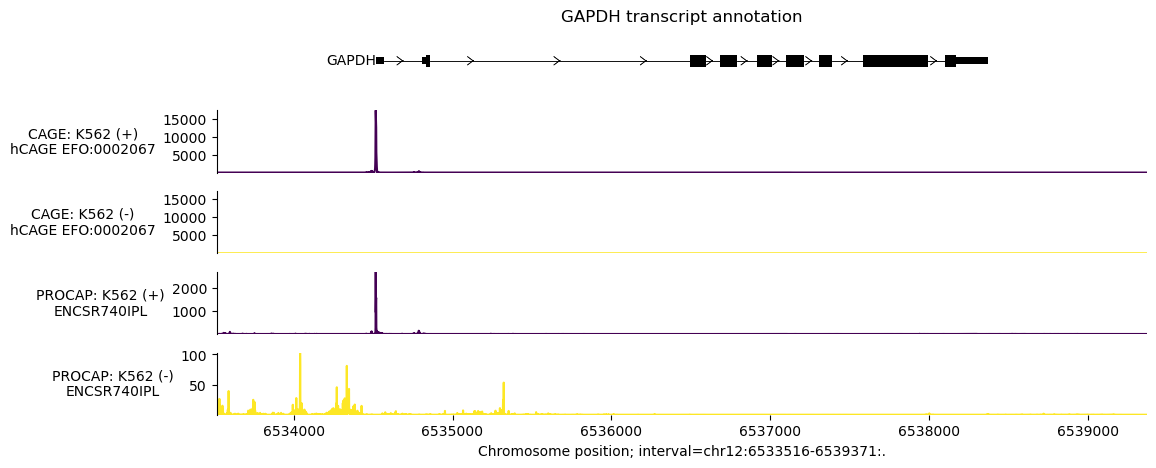

In [44]:
from alphagenome.visualization import plot_components as pc

gene_interval=gene_annotation.get_gene_interval(gtf, gene_symbol=GENE_NAME)
longest_transcripts = longest_transcript_extractor.extract(gene_interval)
interval_annotation=[pc.IntervalAnnotation(
    [
        genome.Interval(chrom, start, start+1, name='start'),
        genome.Interval(chrom, end, end+1, name='end')
    ],
    colors='red',
)]
plot=pc.plot(
    [
        pc.TranscriptAnnotation(longest_transcripts),
        pc.Tracks(
            tdata=output.cage,
            ylabel_template='CAGE: {biosample_name} ({strand})\n{name}',
            shared_y_scale=True,
        ),
        pc.Tracks(
            tdata=output.procap,
            ylabel_template='PROCAP: {biosample_name} ({strand})\n{name}',
        ),
    ],
    interval=vis_interval,
    # annotations=[interval_annotation],
    # annotations=[pc.IntervalAnnotation([genome.Interval(chrom, start, end+1, name="TSS")], colors='red')],

    title=f"{GENE_NAME} transcript annotation",
    fig_width=12
)

import matplotlib.ticker as mticker

# Choose tick style: 'plain' or 'e6'
TICK_STYLE = 'plain'
ax = plot.axes[-1]
if TICK_STYLE == 'plain':
    fmt = mticker.ScalarFormatter(useOffset=False)
    fmt.set_scientific(False)
    ax.xaxis.set_major_formatter(fmt)
elif TICK_STYLE == 'e6':
    ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f"{x/1e6:.3f}e6"))


In [ ]:
from alphagenome.data import gene_annotation
from utils import load_gtf_feather

# gtf = load_gtf_feather(data_dir=DATA_DIR)

# 1) 전체 transcript TSS 추출 (transcript 기준)
tss = gene_annotation.extract_tss(gtf, feature="transcript")

# 2) 특정 gene만 필터
GENE = "HBB"
tss_gene = tss[tss["gene_name"] == GENE]

tss_gene[["Chromosome", "Start", "End", "Strand", "gene_name", "transcript_id"]].head()


,Chromosome,Start,End,Strand,gene_name,transcript_id
1852629,chr11,5227071,5227071,-,HBB,ENST00000335295.4
1852640,chr11,5227197,5227197,-,HBB,ENST00000647020.1
1852651,chr11,5227071,5227071,-,HBB,ENST00000633227.1
1852662,chr11,5226823,5226823,-,HBB,ENST00000475226.1
1852665,chr11,5227072,5227072,-,HBB,ENST00000485743.1
